#### Competition Describtion: 
The challenge of this competition is to predict if the car purchased at the Auction is a good / bad buy.
All the variables in the data set are defined in the file Carvana_Data_Dictionary.txt
The data contains missing values 
The dependent variable (IsBadBuy) is binary (C2)
There are 32 Independent variables (C3-C34)
The data set is split to 60% training and 40% testing.


In [1]:
#Importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows",200)
pd.set_option("display.max_columns",35)

import warnings
warnings.simplefilter('ignore')
import seaborn as sns

In [2]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")
example=pd.read_csv("example_entry.csv")

### EDA
#### Data Exploration
Examining the dataset to understand its structure, size, and the types of variables it contains.


In [3]:
train.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [4]:
test.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [5]:
example.head()

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0


In [6]:
print("Our train shape is:",train.shape)
print("Our test shape is:",test.shape)

Our train shape is: (72983, 34)
Our test shape is: (48707, 33)


In [7]:
train['IsBadBuy'].value_counts(normalize=True)
# %87 of the purchases was good deal whereas %13 was bad deal.

0    0.877012
1    0.122988
Name: IsBadBuy, dtype: float64

In [8]:
df=train.append(test)
df.sample(20)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
68695,68727,0.0,12/2/2010,ADESA,2008,2,CHEVROLET,COLORADO PICKUP 2WD,W/T,REG CAB 3.7L LS,WHITE,AUTO,2.0,Covers,67814,AMERICAN,SMALL TRUCK,GM,6749.0,8572.0,11816.0,13288.0,8933.0,10731.0,12990.0,14999.0,NO,GREEN,22916,80817,CO,4215.0,0,630
25235,25253,0.0,3/18/2010,OTHER,2005,5,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,94923,AMERICAN,LARGE,GM,0.0,0.0,0.0,0.0,5148.0,6446.0,8514.0,9948.0,NaN,NaN,3453,80229,CO,5965.0,0,2351
67499,67531,1.0,6/16/2009,ADESA,2004,5,FORD,TAURUS 3.0L V6 EFI,SE,4D SEDAN SE,SILVER,AUTO,1.0,Alloy,76432,AMERICAN,MEDIUM,FORD,2772.0,3865.0,3494.0,4674.0,2772.0,3865.0,3494.0,4674.0,NaN,NaN,20833,78754,TX,3880.0,0,920
17541,90563,NaN,12/1/2010,OTHER,2008,2,CHRYSLER,PT CRUISER,Bas,4D SEDAN,WHITE,AUTO,2.0,Covers,62139,AMERICAN,MEDIUM,CHRYSLER,6617.0,7444.0,11096.0,12483.0,7592.0,8676.0,10802.0,11957.0,NO,GREEN,99761,90045,CA,6000.0,0,1215
42839,42863,0.0,4/8/2009,MANHEIM,2006,3,DODGE,MAGNUM V6 2.7L V6 MP,SE,WAGON 2.7L,GREY,AUTO,2.0,Covers,74207,AMERICAN,SPECIALTY,CHRYSLER,7500.0,8740.0,8600.0,9939.0,7500.0,8740.0,8600.0,9939.0,NaN,NaN,21973,32124,FL,8300.0,0,1389
67332,67364,1.0,10/27/2010,ADESA,2005,5,MAZDA,MAZDA6,i,4D SEDAN I,BEIGE,AUTO,NaN,NaN,86386,OTHER ASIAN,MEDIUM,OTHER,5439.0,6695.0,8719.0,10231.0,5114.0,6309.0,8461.0,9920.0,NaN,NaN,52644,77086,TX,8445.0,0,1373
39781,39804,0.0,6/3/2010,MANHEIM,2007,3,SUZUKI,FORENZA,NaN,4D SEDAN,WHITE,AUTO,2.0,Covers,32156,OTHER ASIAN,MEDIUM,OTHER,5315.0,6293.0,8493.0,9233.0,4943.0,6190.0,8443.0,9335.0,NaN,NaN,20234,85353,AZ,5370.0,0,462
65457,65488,0.0,7/15/2009,MANHEIM,2007,2,CHEVROLET,MALIBU 4C 2.2L I4 MP,LS,4D SEDAN LS,WHITE,AUTO,2.0,Covers,69000,AMERICAN,MEDIUM,GM,6325.0,7698.0,7331.0,8814.0,6918.0,8067.0,7971.0,9212.0,NaN,NaN,99750,84087,UT,6500.0,0,923
41315,114347,NaN,5/21/2009,MANHEIM,2006,3,CHRYSLER,PT CRUISER 2.4L I4 S,Tou,4D SEDAN,WHITE,AUTO,1.0,Alloy,54747,AMERICAN,MEDIUM,CHRYSLER,5443.0,6528.0,6378.0,7550.0,5443.0,6528.0,6378.0,7550.0,NaN,NaN,16926,92337,CA,5250.0,0,1086
3390,3393,0.0,11/24/2010,ADESA,2004,6,PONTIAC,VIBE,Bas,4D WAGON,RED,AUTO,2.0,Covers,75950,AMERICAN,MEDIUM,GM,3915.0,5064.0,6622.0,7901.0,4295.0,5179.0,7288.0,8442.0,NaN,NaN,52117,20166,VA,6310.0,0,569


In [9]:
#List of the missing values 
df.isnull().sum().sort_values(ascending=False)

PRIMEUNIT                            115755
AUCGUART                             115755
IsBadBuy                              48707
WheelType                              5362
WheelTypeID                            5357
Trim                                   3910
MMRCurrentRetailCleanPrice              458
MMRCurrentAuctionCleanPrice             458
MMRCurrentAuctionAveragePrice           458
MMRCurrentRetailAveragePrice            458
MMRAcquisitionAuctionAveragePrice        28
MMRAcquisitionAuctionCleanPrice          28
MMRAcquisitionRetailAveragePrice         28
MMRAcquisitonRetailCleanPrice            28
SubModel                                 13
Color                                    12
Transmission                             12
Nationality                              12
Size                                     12
TopThreeAmericanName                     12
BYRNO                                     0
VNZIP1                                    0
VNST                            

In [10]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,121690.000000,72983.000000,121690.000000,121690.000000,116333.000000,121690.000000,121662.000000,121662.000000,121662.000000,121662.000000,121232.000000,121232.000000,121232.000000,121232.000000,121690.000000,121690.000000,121690.000000,121690.000000,121690.000000
mean,60873.721152,0.122988,2005.338442,4.192317,1.481463,71530.557581,6131.300710,7381.581398,8518.292203,9878.809645,6124.184093,7387.528070,8790.307386,10165.581332,25980.432287,56504.093533,6742.914814,0.023971,1278.392045
std,35142.364075,0.328425,1.730953,1.709340,0.519645,14542.555509,2458.755863,2719.708057,3146.250127,3376.088147,2431.678295,2684.936023,3079.347677,3300.252061,25100.691848,26180.294422,1763.580596,0.152959,604.148576
min,1.000000,0.000000,2001.000000,0.000000,0.000000,223.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,30443.250000,0.000000,2004.000000,3.000000,1.000000,61990.250000,4276.000000,5417.000000,6324.000000,7529.000000,4267.000000,5402.000000,6572.000000,7826.000000,17212.000000,32124.000000,5450.000000,0.000000,853.000000
50%,60873.500000,0.000000,2005.000000,4.000000,1.000000,73379.000000,6105.000000,7306.000000,8466.000000,9824.000000,6058.000000,7301.000000,8739.000000,10110.000000,19638.000000,64012.000000,6720.000000,0.000000,1169.000000
75%,91306.750000,0.000000,2007.000000,5.000000,2.000000,82428.500000,7761.000000,9036.000000,10658.000000,12124.000000,7720.000000,9020.000000,10895.000000,12333.000000,22808.000000,79932.000000,7910.000000,0.000000,1623.000000
max,121746.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99791.000000,99224.000000,56950.000000,1.000000,7498.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121690 entries, 0 to 48706
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   RefId                              121690 non-null  int64  
 1   IsBadBuy                           72983 non-null   float64
 2   PurchDate                          121690 non-null  object 
 3   Auction                            121690 non-null  object 
 4   VehYear                            121690 non-null  int64  
 5   VehicleAge                         121690 non-null  int64  
 6   Make                               121690 non-null  object 
 7   Model                              121690 non-null  object 
 8   Trim                               117780 non-null  object 
 9   SubModel                           121677 non-null  object 
 10  Color                              121678 non-null  object 
 11  Transmission                       12167

### Data Visualization
Creating visual representations of the data to help identify patterns, trends, and outliers


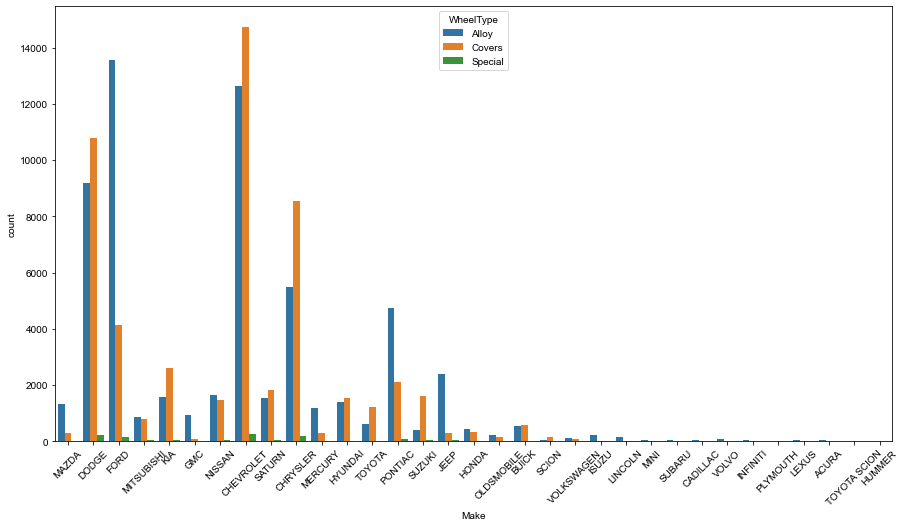

In [12]:
#This plot will show the count of different car makes and how many of them have different wheel types. 
#It will give an idea about the relative popularity of different car makes and wheel types.

plt.figure(figsize=(15,8))
sns.countplot(x=df['Make'],hue=df['WheelType']);
plt.xticks(rotation=45);
sns.set_style("dark");

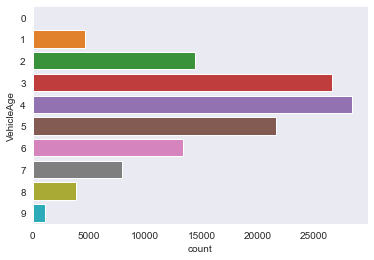

In [13]:
# This plot shows the frequency of each category of "VehicleAge" in the dataframe.
sns.countplot(data=df, y='VehicleAge');

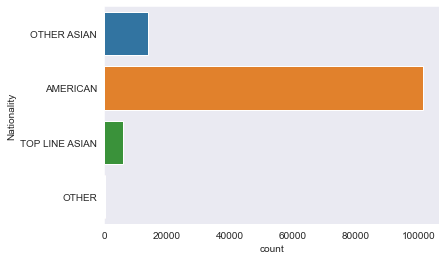

In [14]:
#conclusion of this plot is, that most of the cars are from USA
sns.countplot(data=df, y='Nationality');

### Data Cleaning
Removing or correcting any inaccuracies or missing values in the dataset.


In [15]:
#We deleted these columns from our data
df.drop(['Model',"Trim","SubModel"],axis=1,inplace=True)

In [16]:
df['Transmission'].replace("Manual","MANUAL",inplace=True)

In [17]:
#Filling the missing values
df['Color'].fillna(value='Color_Unknown',inplace=True)
df['Transmission'].fillna(value='Transmission_unk',inplace=True)
df['Nationality'].fillna(value='Nationality_unk',inplace=True)
df['TopThreeAmericanName'].fillna(value='Top_unk',inplace=True)
df['AUCGUART'].fillna(value='AUC_unk',inplace=True)

In [18]:
df.drop(['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
                'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
                'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
                'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice',"PRIMEUNIT","WheelTypeID"],
               inplace=True,axis=1)

In [19]:
df.fillna({'WheelType': 'Alloy','Size': 'MEDIUM'}, inplace=True)

### Data preprocessing
Transforming the data to make it suitable for modeling. This can include normalizing, scaling, or encoding categorical variables.


In [20]:
#We converted all object values into the numerical values using dummies
df_dummies=pd.get_dummies(df,drop_first=True)

In [21]:
df_train=df_dummies.iloc[:72983]
df_test = df_dummies.iloc[72983:]

In [22]:
from sklearn.model_selection import train_test_split
x =df_train.drop(['RefId','IsBadBuy'],axis=1)
y =df_train['IsBadBuy']

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [24]:
def algo_test(x, y):
    L = LogisticRegression()
    KNN = KNeighborsClassifier()
    DTC = DecisionTreeClassifier()
    RFC = RandomForestClassifier()
    GBC = GradientBoostingClassifier()
    XGBC = XGBClassifier()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

    algos = [L, KNN, DTC, RFC, GBC, XGBC]
    algo_names = ['Logistic', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGradientBooting']
    accuracy = []
    auc = []
        
    result = pd.DataFrame(columns = ['Accuracy','AUC'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train, y_train)
             
        accuracy.append(accuracy_score(y_test, algo.predict(x_test)))
        auc.append(roc_auc_score(y_test, algo.predict_proba(x_test)[:,1]))

    result.Accuracy = accuracy
    result.AUC = auc
    
    return result.sort_values('Accuracy', ascending=False)

### Data modeling
Creating models to make predictions or classify the data.


In [26]:
algo_test(x,y)

,Accuracy,AUC
Gradient Boosting,0.878126,0.703015
XGradientBooting,0.877989,0.709009
Random Forest,0.877578,0.687467
Logistic,0.877167,0.616943
KNN,0.865041,0.552417
Decision Tree,0.815099,0.544238


In [27]:
df=df_test[df_train.drop("IsBadBuy",axis=1).columns]

In [29]:
df_test.drop(["IsBadBuy"],axis=1,inplace=True)

In [30]:
from sklearn.model_selection import train_test_split
x =df_train.drop(['RefId','IsBadBuy'],axis=1)
y =df_train['IsBadBuy']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [41]:
Gb=GradientBoostingClassifier()
Gb.fit(X_train,y_train)
Gb.score(X_test,y_test)
predict=Gb.predict(df_test.drop('RefId',axis=1))

In [42]:
Submission=pd.DataFrame(data=predict,columns=['IsBadBuy'])
Submission.sample(5)

,IsBadBuy
20115,0.0
44639,0.0
16177,0.0
17954,0.0
12424,0.0


In [45]:
Submission['RefId']=df_test['RefId']
Submission.set_index('RefId',inplace=True)

In [46]:
Submission.to_csv('GradientBoostingPredicted2.csv')